In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sn

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix
# Continuous Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 


In [2]:
obesity_data = pd.read_csv('../data/obesity_numeric.csv')
obesity_df = pd.DataFrame(obesity_data)
obesity_df = obesity_df.rename(columns={"family_history_with_overweight":"FHWO", "NObeyesdad":"WeightLevel"})
obesity_df['BMI'] = [obesity_df.at[i,'Weight']/(obesity_df.at[i,'Height']*obesity_df.at[i,'Height']) for i in range(obesity_df['Weight'].size)]
obesity_df.head()

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightLevel,BMI
0,0,21.0,1.6,64.0,1,0,1,2.0,1,0,1,0,0,1,0,3,1,25.000000
1,0,21.0,1.5,56.0,1,0,2,2.0,1,1,2,1,3,0,1,3,1,24.888889
2,1,23.0,1.8,77.0,1,0,1,2.0,1,0,1,0,2,1,2,3,1,23.765432
3,1,27.0,1.8,87.0,0,0,2,2.0,1,0,1,0,2,0,2,4,2,26.851852
4,1,22.0,1.8,89.8,0,0,1,0.0,1,0,1,0,0,0,1,3,2,27.716049


In [3]:
# Split predictors and responses
x = obesity_df.drop(['BMI', 'WeightLevel','Height','Weight'], axis = 1) #Remove response columns , and height and weight . Obesity is base on BMI , which is base on height and weight .
y = obesity_df['WeightLevel']
print(x)
print(y)

      Gender   Age  FHWO  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  \
0          0  21.0     1     0     1  2.0     1      0     1    0    0    1   
1          0  21.0     1     0     2  2.0     1      1     2    1    3    0   
2          1  23.0     1     0     1  2.0     1      0     1    0    2    1   
3          1  27.0     0     0     2  2.0     1      0     1    0    2    0   
4          1  22.0     0     0     1  0.0     1      0     1    0    0    0   
...      ...   ...   ...   ...   ...  ...   ...    ...   ...  ...  ...  ...   
2106       0  21.0     1     1     2  2.0     1      0     1    0    2    1   
2107       0  22.0     1     1     2  2.0     1      0     1    0    1    1   
2108       0  23.0     1     1     2  2.0     1      0     1    0    1    1   
2109       0  24.0     1     1     2  2.0     1      0     2    0    1    1   
2110       0  24.0     1     1     2  2.0     1      0     2    0    1    1   

      CALC  MTRANS  
0        0       3  
1        

In [4]:
# Set data into train and test
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [5]:
# Simple linear regression
model_lin = LinearRegression().fit(x_train, y_train)
print("Train set: ",model_lin.score(x_train,y_train))
print("Test set: ",model_lin.score(x_test,y_test))

Train set:  0.4636547770353384
Test set:  0.4568163436255793


In [6]:
# Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
print("Train set: ",model_gbr.score(x_train,y_train))
print("Test set: ",model_gbr.score(x_test,y_test))

Train set:  0.734925233830106
Test set:  0.6689764733973279


In [7]:
# Random Forest Regressor
model_rfr = RandomForestRegressor(random_state=0).fit(x_train, y_train)
print("Train set: ",model_rfr.score(x_train,y_train))
print("Test set: ",model_rfr.score(x_test,y_test))

Train set:  0.9617558162138892
Test set:  0.7968416542765465


In [8]:
# Logistic Regression
model_log = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)
print("Train set: ",model_log.score(x_train,y_train))
print("Test set: ",model_log.score(x_test,y_test))

Train set:  0.6102337334175616
Test set:  0.6193181818181818


In [9]:
# K Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=11).fit(x_train, y_train)
print("Train set: ",model_knn.score(x_train,y_train))
print("Test set: ",model_knn.score(x_test,y_test))

Train set:  0.7485786481364498
Test set:  0.7253787878787878


In [10]:
# SVM
model_svm = SVC(kernel = 'linear').fit(x_train, y_train)
print("Train set: ",model_svm.score(x_train,y_train))
print("Test set: ",model_svm.score(x_test,y_test))

Train set:  0.6456096020214782
Test set:  0.6515151515151515


In [11]:
# Test Prediction
test = np.array([0,45,1,1,0,1,0,1,2,0,1,2,2,0]).reshape(1,-1) #3
#test = np.array([1,28,0,1,1,1,0,0,0,2,0,1,1,0]).reshape(1,-1) #3
#test = np.array([1,52,1,1,0,1,0,1,2,0,1,2,2,0]).reshape(1,-1) #3
test_df = pd.DataFrame(test)
model_lin.predict(test)

array([3.6840438])

In [12]:
# Continuous Model Predictions
print("LR Prediction: ",model_lin.predict(test))
print("GBR Prediction: ",model_gbr.predict(test))
print("RFR Prediction: ",model_rfr.predict(test))

LR Prediction:  [3.6840438]
GBR Prediction:  [2.62075926]
RFR Prediction:  [2.46]


In [13]:
# Discrete Model Predictions
print("LR Prediction: ",model_log.predict(test))
print("KNN Prediction: ",model_knn.predict(test))
print("SVC Prediction: ",model_svm.predict(test))

LR Prediction:  [3]
KNN Prediction:  [2]
SVC Prediction:  [3]


In [14]:
# Save models for predictor 
filename = "../data/model_lin.sav"
file = open(filename, 'wb')
pickle.dump(model_lin, file)
file.close()

filename = "../data/model_gbr.sav"
file = open(filename, 'wb')
pickle.dump(model_gbr, file)
file.close()

filename = "../data/model_rfr.sav"
file = open(filename, 'wb')
pickle.dump(model_rfr, file)
file.close()

filename = "../data/model_log.sav"
file = open(filename, 'wb')
pickle.dump(model_log, file)
file.close()

filename = "../data/model_knn.sav"
file = open(filename, 'wb')
pickle.dump(model_knn, file)
file.close()

filename = "../data/model_svm.sav"
file = open(filename, 'wb')
pickle.dump(model_svm, file)
file.close()



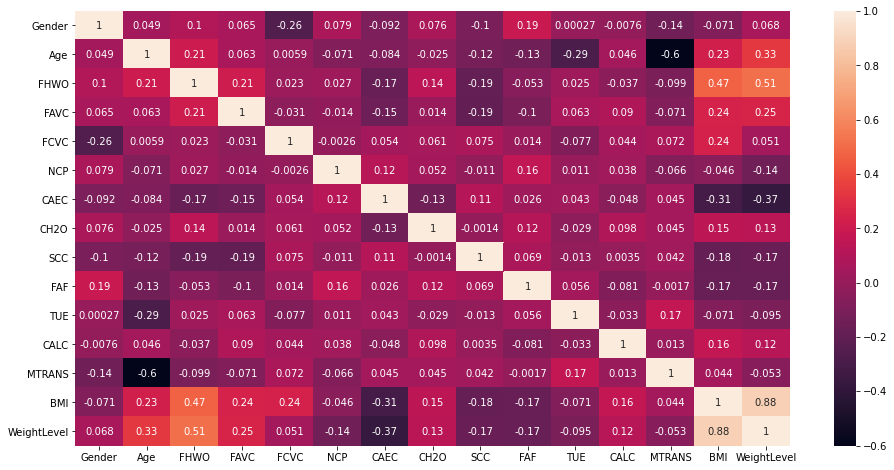

In [16]:
numbers = obesity_df[['Gender','Age','FHWO','FAVC','FCVC','NCP','CAEC','CH2O','SCC','FAF','TUE','CALC','MTRANS','BMI','WeightLevel']]
corrMatrix = numbers.corr()

figure(figsize = (16,8))
sn.heatmap(corrMatrix,annot=True)
plt.show()